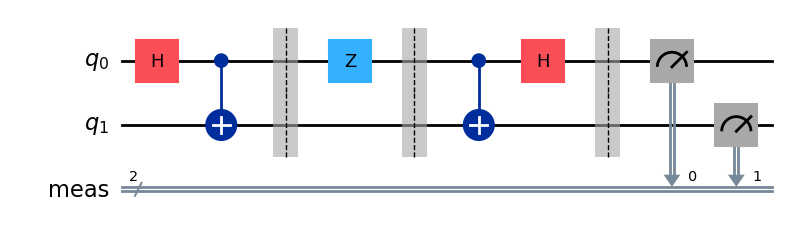

In [1]:
#importing neccessary modules
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator

#specify the bits to be transmitted
c = "0"
d = "1"

#creating Two Quantum Bits Circuit
protocol = QuantumCircuit(2)

# Prepare ebit used for superdense coding
protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

# Alice's operations
if c == "1":
    protocol.x(0)
if d == "1":
    protocol.z(0)
protocol.barrier()

# Bob's actions
protocol.cx(0, 1)
protocol.h(0)

#measure it
protocol.measure_all()

#draw the circuit
protocol.draw(output='mpl', style= 'iqp')


{'10': 15, '11': 26, '00': 26, '01': 957}


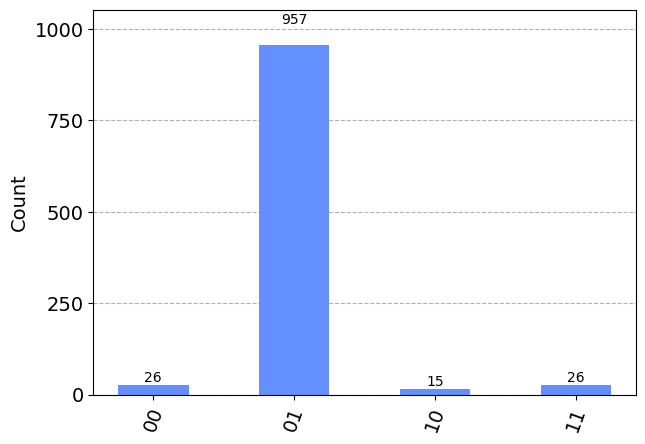

In [2]:
# Use the following code instead if you want to run on a simulator:
from qiskit_ibm_runtime.fake_provider import FakeCairoV2
backend = FakeCairoV2()

# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(protocol, backend)
transpiled_circuit.draw('mpl', style="iqp")

# Run the transpiled circuit using the simulated fake backend
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
print(counts)
plot_histogram(counts)